# Прогнозы и предсказания<a class="tocSkip">

### Описание проекта<a class="tocSkip">

**Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Необходимо провести анализ и подготовить план действий по удержанию клиентов.**

### Наши цели:<a class="tocSkip">
* **научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;**
* **сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;**
* **проанализировать основные признаки, наиболее сильно влияющие на отток;**
* **сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.**

### Описание данных<a class="tocSkip">

**«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:**
* **'Churn' — факт оттока в текущем месяце;**
* **'gender' — пол;**
* **'Near_Location' — проживание или работа в районе, где находится фитнес-центр;**
* **'Partner' — сотрудник компании-партнёра клуба;**
* **Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);**
* **'Phone' — наличие контактного телефона;**
* **'Age' — возраст;**
* **'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);**
* **'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);**
* **'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);**
* **'Group_visits' — факт посещения групповых занятий;**
* **'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;**
* **'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;**
* **'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.**


### Оглавление<a class="tocSkip">

### [1 Установка библиотек и загрузка данных](#load)<a class="tocSkip">

### [2 Исследовательский анализ данных (EDA)](#EDA)<a class="tocSkip">

### [3 Модель прогнозирования оттока клиентов](#Model)<a class="tocSkip">

* **[3.1 Логистическая регрессия](#Logistic_regression)**

* **[3.2 Случайный лес](#Random_Forest)**

### [4 Кластеризация клиентов](#Clustering_clients)<a class="tocSkip">

### [5 Выводы и базовые рекомендации по работе с клиентами](#conclusion)<a class="tocSkip">

<a id="load"></a>
## 1 Установка библиотек и загрузка данных<a class="tocSkip">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# прочитаем из csv-файла данные
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# выведем полученные данные
df.sample(6)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2945,1,1,0,0,1,6,0,27,299.473072,6.0,2,0.677683,0.000000,1
2685,1,1,0,1,1,1,1,32,54.527760,1.0,0,1.999755,1.896575,1
246,0,1,1,1,1,1,0,30,95.804021,1.0,4,1.339231,1.419077,0
2489,1,1,1,1,1,12,1,26,199.501236,12.0,5,0.000000,0.000000,0
30,0,1,1,0,1,1,1,32,44.672508,1.0,1,1.771692,1.687872,0
1101,1,1,1,1,1,12,0,29,110.842968,10.0,2,1.418326,1.362575,0


Данные загруженны, - переходим к следующему этапу.

<a id="EDA"></a>
## 2 Исследовательский анализ данных (EDA)<a class="tocSkip">

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# проверим даннные на наличие дубликатов
df.duplicated().sum()

0

Пропусков, дубликатов не обнаружено, в колличественных данных средние и медианные значения близки.

In [6]:
# сгруппируем данные по "оттоку"
df.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


В полученной таблице мы видим, что пол, возраст, наличие контактного телефона и работа/проживание в районе, где находится фитнес-центр не влияют на отток клиентов, зато очевидно влияние продолжительности текущего абонемента, срока до окончания действующего абонемента и времени с момента первого обращения в фитнес-центр, частоты посещений клуба - чем больше, тем ниже вероятность оттока.

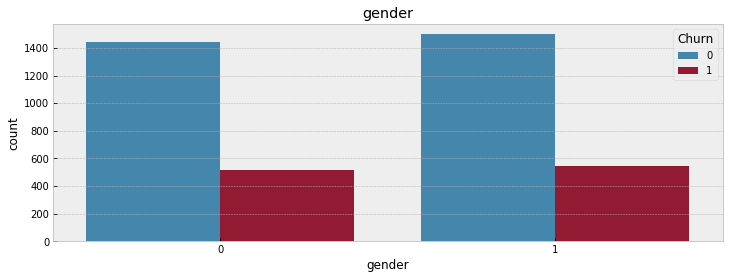

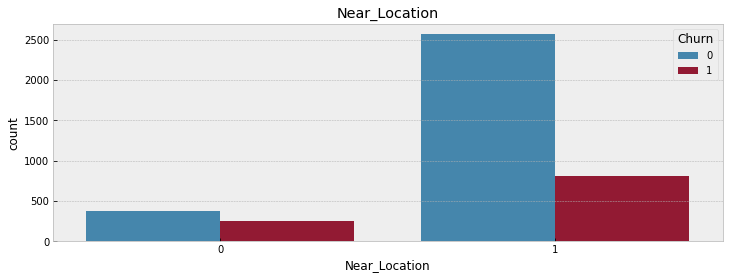

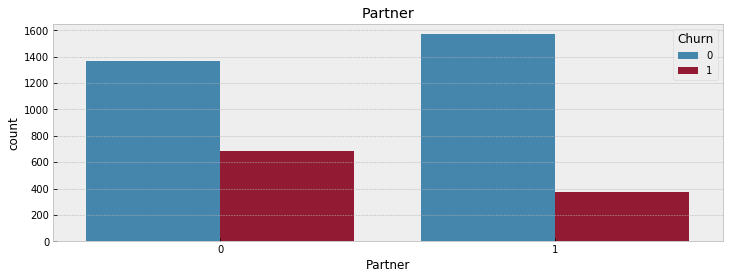

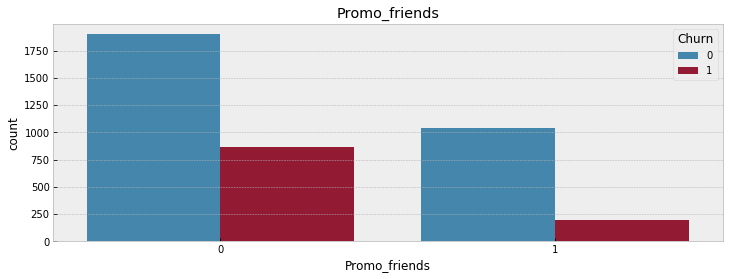

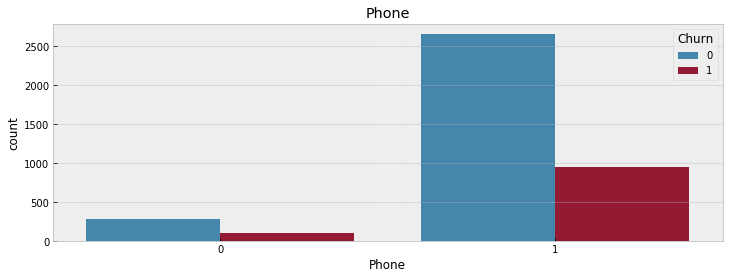

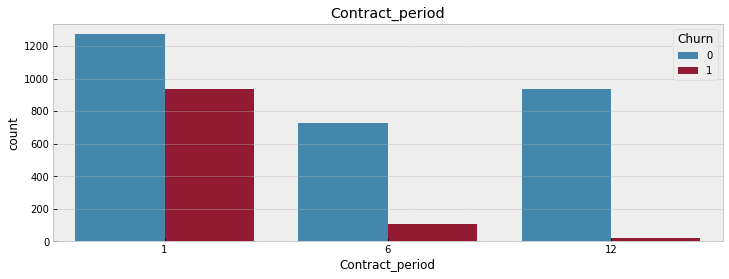

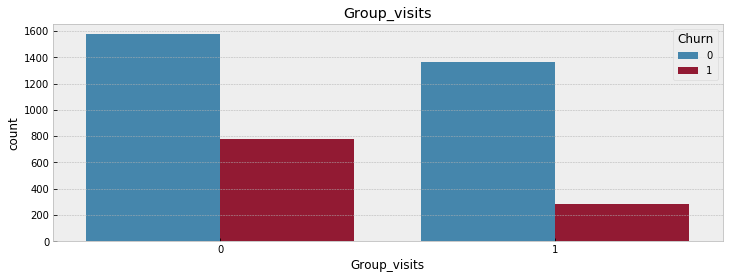

In [7]:
# для категориальных признаков применим метод countplot
for column in ['gender', 'Near_Location', 'Partner','Promo_friends', 'Phone', 'Contract_period', 'Group_visits']:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=df[column], hue='Churn', data=df)
    plt.title(column)
    plt.show()

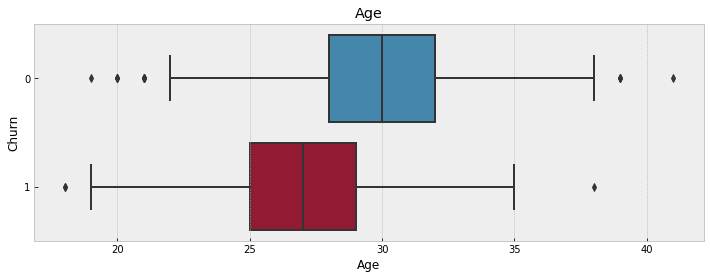

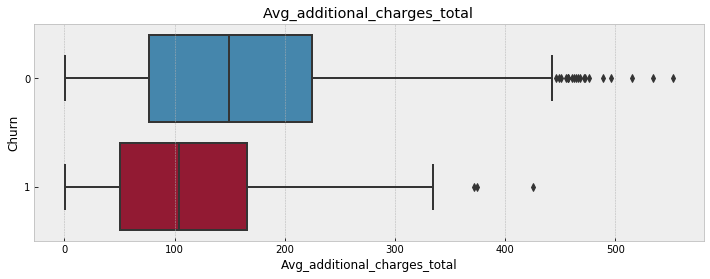

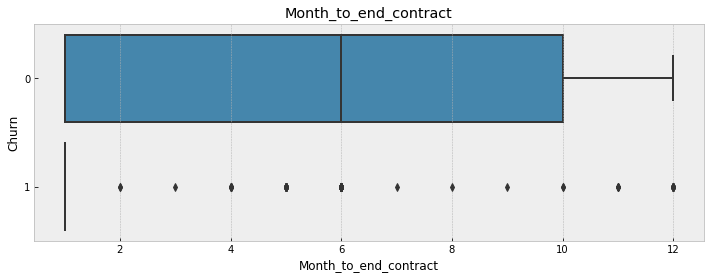

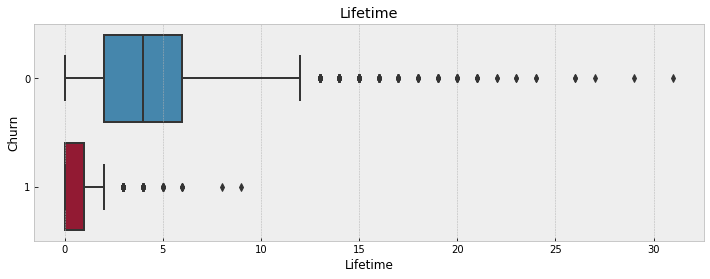

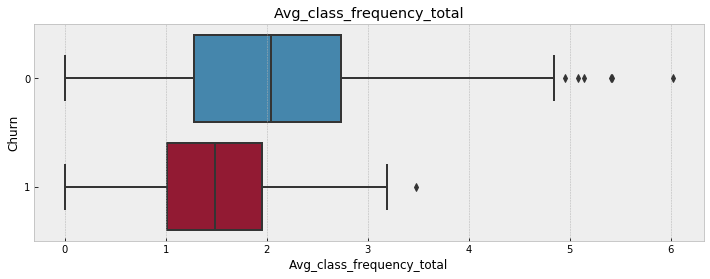

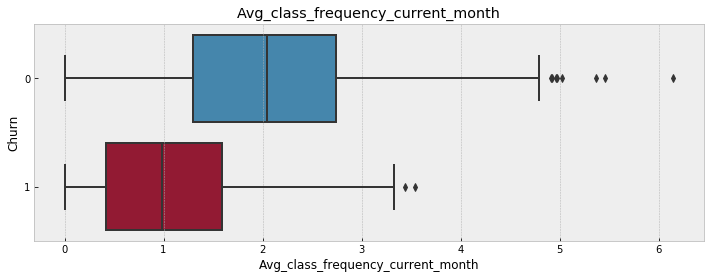

In [8]:
# для количественных признаков применим boxplot
for column in ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total',\
               'Avg_class_frequency_current_month']:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column], y='Churn', orient="h", data=df)
    plt.title(column)
    plt.show()

Графика в целом подтвердили сказанное выше, за исключением возраста - более молодые чаще бросают тренировки.

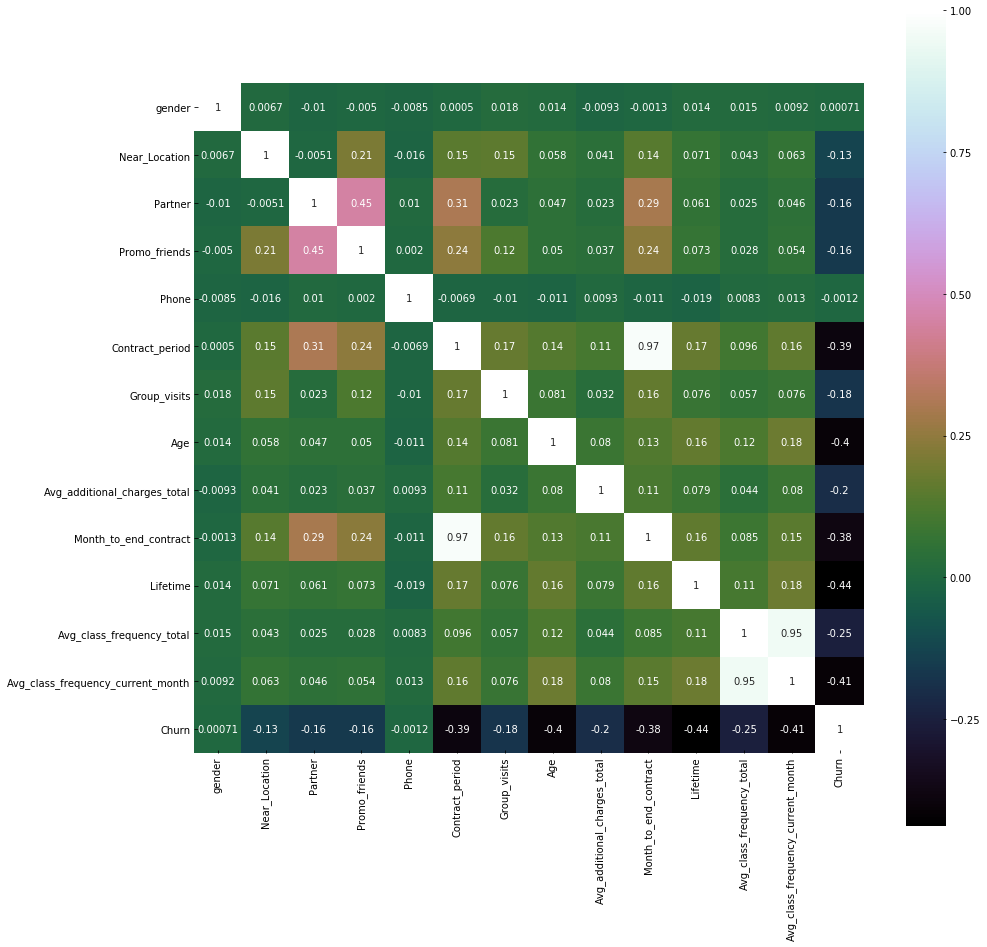

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), square=True,annot=True,cmap='cubehelix')
plt.show()

Судя по "тепловой карте" можно сказать, что есть мультиколлениарные признаки, - **Contract_period / Month_to_end_contract** и **Average_frequency_total / Avg_class_frequency_current_month**, - удалим по одному из каждой пары.

In [10]:
df = df.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)

<a id="Model"></a>
## 3 Модель прогнозирования оттока клиентов<a class="tocSkip">

<a id="Logistic_regression"></a>
* **Логистическая регрессия**

In [11]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [12]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [15]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

In [16]:
# обучим модель
lr_model.fit(X_train_st, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, lr_predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.81


<a id="Random_Forest"></a>
* **Случайный лес**

In [19]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь

In [20]:
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.79
Recall: 0.76


Модель "логистическая регрессия" показывает себя лучше по всем метрикам

<a id="Clustering_clients"></a>
## 4 Кластеризация клиентов<a class="tocSkip">

In [23]:
# обязательная стандартизация данных перед работой с алгоритмами
X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

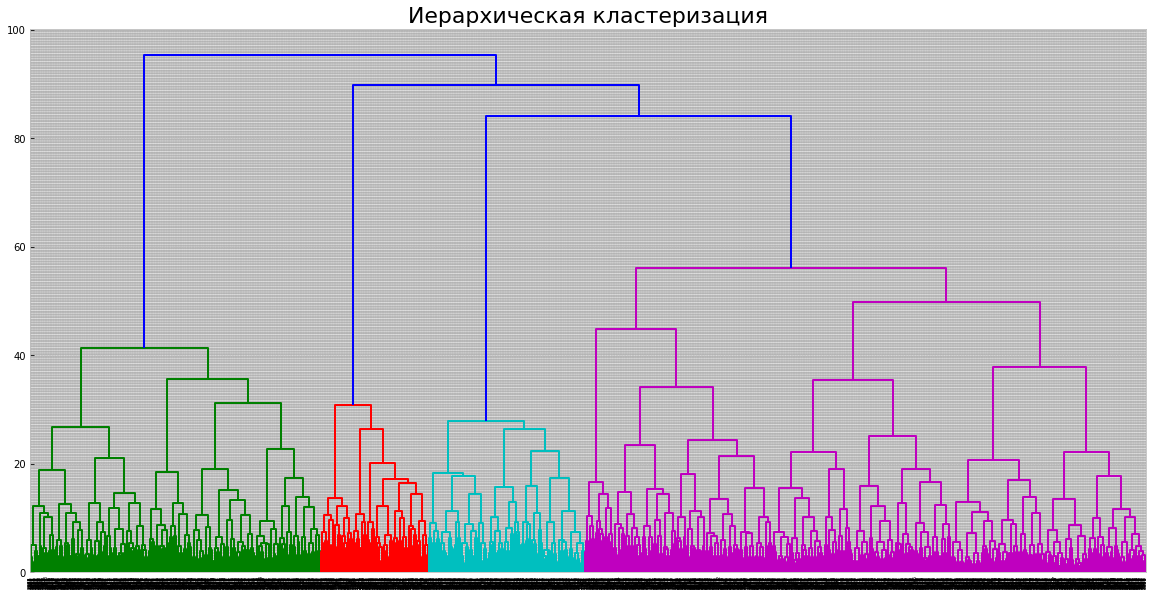

In [24]:
# визуализируем дендрограмму
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация', fontsize=22)
plt.show()

На основании полученного графика кластеров можно выделить 4 кластера.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. В соответствии с заданием за число кластеров примем n=5.

In [25]:
# зададим число кластеров
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
Near_Location,0.000000,0.995238,1.000000,1.000000,0.862694
Partner,0.488414,0.955238,0.238516,0.250287,0.471503
Promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
Phone,1.000000,1.000000,1.000000,1.000000,0.000000
Contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
Group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
Age,28.721925,29.543810,28.770318,29.536165,29.297927
Avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
Lifetime,3.060606,4.380952,3.343640,3.761194,3.940415


C первого взгляда средние значения статистики по кластерам отличаются незначительно. Можем лишь выделить кластер с наиметшей вероятностью оттока - 1 и с наибольшей - 0 и 2.

Построим распределения признаков для кластеров

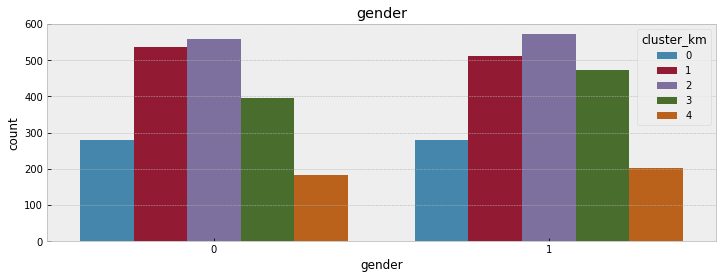

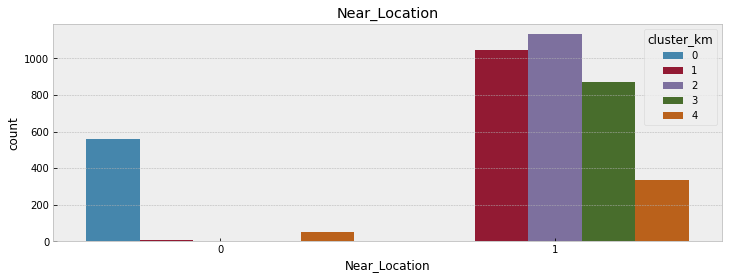

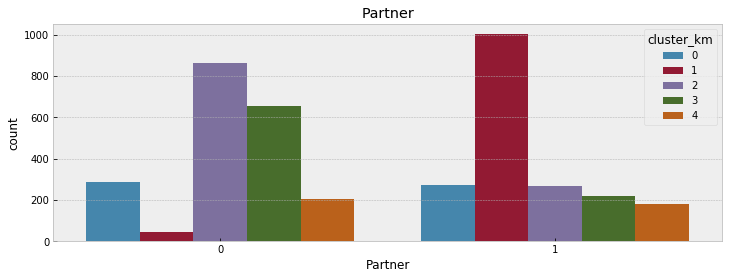

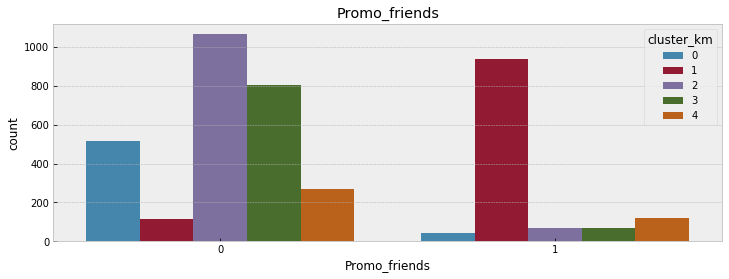

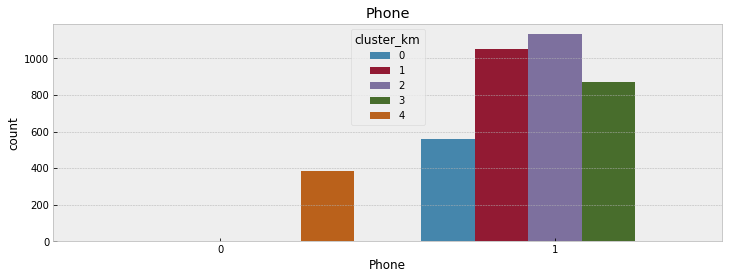

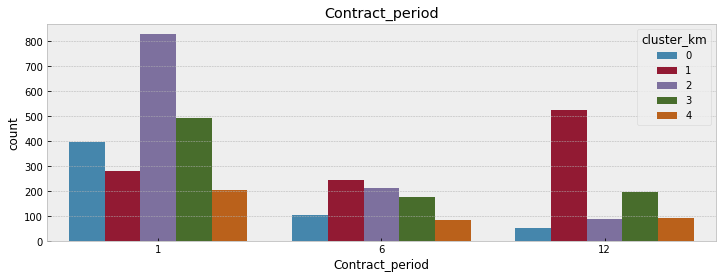

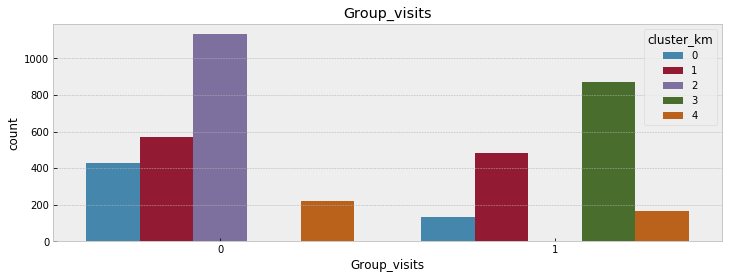

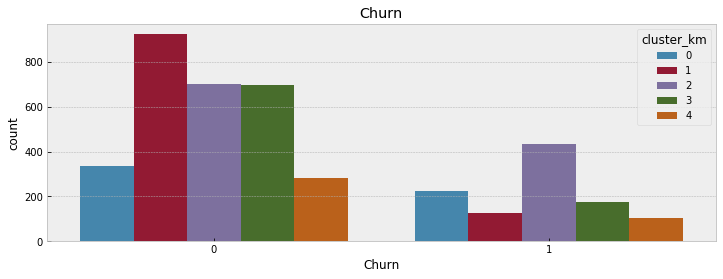

In [26]:
# для категориальных признаков применим метод countplot
for column in ['gender', 'Near_Location', 'Partner','Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Churn']:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=df[column], hue='cluster_km', data=df)
    plt.title(column)
    plt.show()

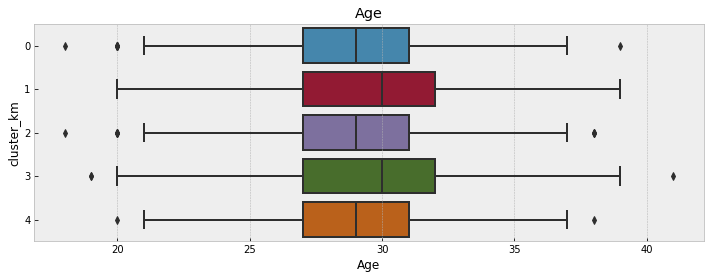

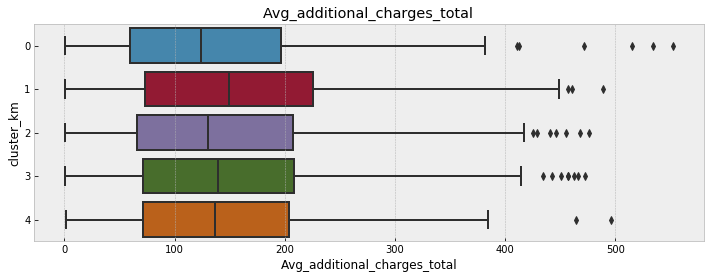

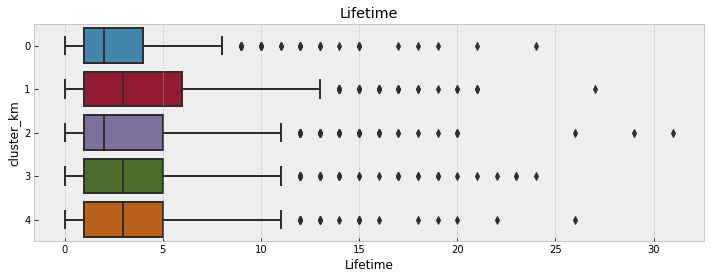

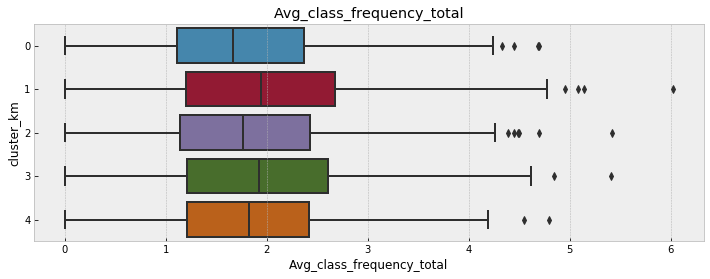

In [27]:
# для количественных признаков применим boxplot
for column in ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total']:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column], y='cluster_km', orient="h", data=df)
    plt.title(column)
    plt.show()

Исходя из построенных графиков можно сказать, что для "надежного" кластера характерно: контрактный период более 1-го месяца, факт первоначальной записи в рамках акции «приведи друга» и участия в партнерской программе, больший возраст (мене чем нагод относительно остальных), более высокая частота посещений в неделю и Lifetime, а так же суммарная выручка от других услуг фитнес-центра.

In [28]:
# посчитаем процент оттока для кластеров
df.groupby('cluster_km')['Churn'].mean().to_frame().style.format('{:,.2%}')

,Churn
cluster_km,
0,39.93%
1,12.10%
2,38.16%
3,20.09%
4,26.68%


<a id="conclusion"></a>
## 5 Выводы и базовые рекомендации по работе с клиентами<a class="tocSkip">

**Обученная нами модель кластеризации спрогнозировала кластеры клиентов с различной вероятностью оттока. Для наименее склонного к оттоку кластера можно выделить ряд особенностей: длительный приод контракта, участие в "партнерской" программе и программе "приведи друга",  более высокая частота посещений в неделю и Lifetime, а так же суммарная выручка от других услуг фитнес-центра. В целом это повторяет первоначальные выводы, что говорит о корректности модели.**


**Таким образом мы могли бы рекомендовать стимулировать клиентов заключать длительные контракты, мотивировать их на более частое посещение клуба в течении недели, а так же развивать программы лояльности.**